<a href="https://colab.research.google.com/github/szh141/UVA-AMF/blob/main/colony_counts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from skimage import io,color,segmentation, filters, measure, feature
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage as ndi

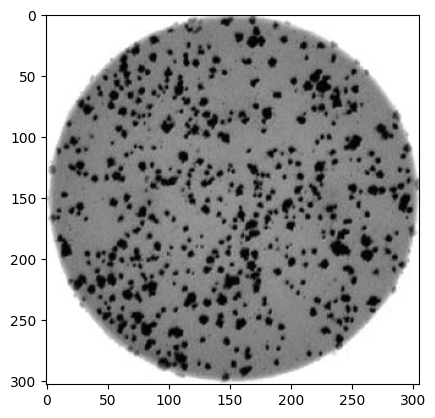

In [5]:
img = io.imread('/content/drive/MyDrive/Colab images/Data/colonies-03.tif')
img = color.rgb2gray(img)
plt.imshow(img,cmap='gray')

358

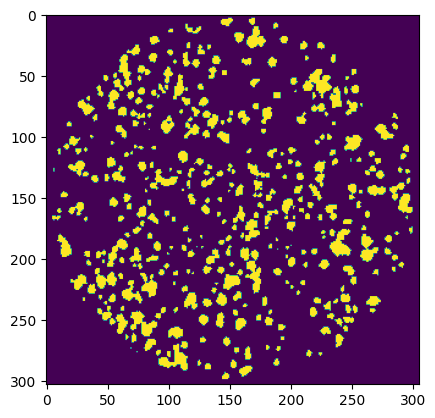

In [32]:
thresholds = filters.threshold_multiotsu(img)
regions = np.digitize(img, bins=thresholds)

img2 = regions<1
plt.imshow(img2)
img3=measure.label(img2)
img3.max()

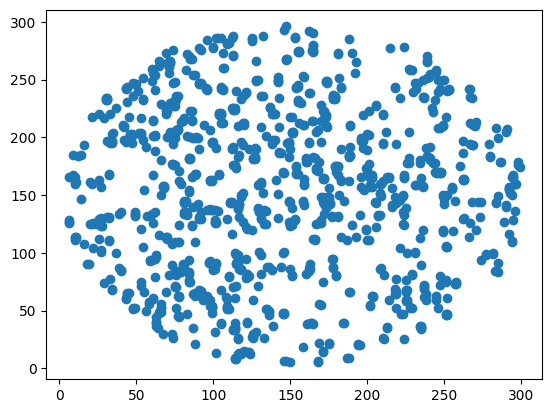

In [28]:
distance = ndi.distance_transform_edt(img2)
coords = feature.peak_local_max(distance, min_distance=1)
plt.scatter(coords[:,1],coords[:,0]) # plot is 1 0

In [36]:
mask = np.zeros(distance.shape, dtype=bool)
mask[coords[:,0],coords[:,1]] = True # img is 0 1
markers = measure.label(mask)
labels = segmentation.watershed(-distance, markers, mask=img2)

602

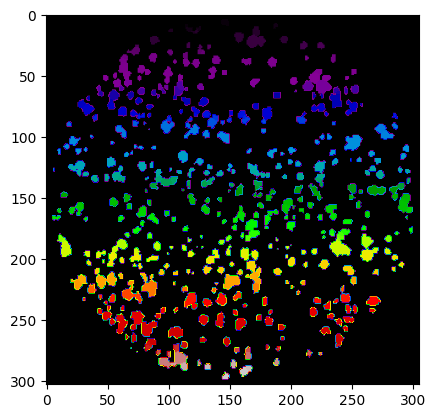

In [37]:
plt.imshow(labels, cmap=plt.cm.nipy_spectral)
img4=measure.label(labels)
img4.max()